# Run finetuned SD model

In [14]:
def txt2img(model_pipeline, prompt, outfile, guidance_scale=7.5):
    output = pipeline(prompt, guidance_scale=guidance_scale)["sample"]
    print(f"Generated test output, please check {outfile}")
    output[0].save(outfile)
    return output
def setup_output_dir():
    out_dir_name = "sd-pipeline-outputs"
    out_dir_path = os.path.join(os.getcwd(), out_dir_name)
    if not os.path.exists(out_dir_path):
        os.mkdir(out_dir_path)
    return out_dir_name, out_dir_path

In [15]:
from diffusers import StableDiffusionPipeline
import os
pipeline = StableDiffusionPipeline.from_pretrained("bbRLdev/sd-font-artist").to("cuda")
out_dir_name, out_dir_path = setup_output_dir()

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

In [41]:
prompt = "an image of a white lowercase letter a on a black background"
out_img_fname = "letter_a_test.jpg"
out_path = os.path.join(os.getcwd(), out_dir_path, out_img_fname)
if os.path.exists(out_path):
    os.remove(out_path)
output = txt2img(pipeline, prompt, out_path)

  0%|          | 0/51 [00:00<?, ?it/s]

Generated test output, please check /home/ubuntu/font-diffusion/sd-pipeline-outputs/letter_a_test.jpg


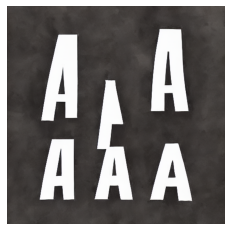

In [42]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
ax = plt.gca()
ax.set_axis_off()
imshow(np.asarray(output[0]))